# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

df = pd.read_parquet('yellow_tripdata_2023-02.parquet')`

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df.info()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive
from google.colab import drive
drive.mount('/Users/anusha/Desktop/Starter Notebook - EDA NYC Taxi')

In [ ]:
import os
import pandas as pd

# Change directory to the folder containing the files
os.chdir('/Users/anusha/Desktop/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialise an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        # Ensure 'tpep_pickup_datetime' is in datetime format
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')

        # Create 'date' and 'hour' columns
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # Check if 'date' and 'hour' columns exist
        if 'date' in data.columns and 'hour' in data.columns:
            # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
            # After completing iteration through each date, we will append this data to the final dataframe.
            sampled_data = pd.DataFrame()

            # Loop through dates and then loop through every hour of each date
            for date in data['date'].unique():
                date_data = data[data['date'] == date]

                # Iterate through each hour of the selected date
                for hour in date_data['hour'].unique():
                    hour_data = date_data[date_data['hour'] == hour]

                    # Sample 0.8% of the hourly data randomly
                    sampled_hour_data = hour_data.sample(frac=0.008, random_state=42)

                    # Add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sampled_hour_data])

            # Concatenate the sampled data of all the dates to a single dataframe
            df = pd.concat([df, sampled_data])
        else:
            print(f"File {file_name} does not contain 'date' and 'hour' columns.")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Display the first few rows of the final dataframe
print(df.head())

In [10]:
data['tpep_pickup_datetime'].unique()

<DatetimeArray>
['2023-01-01 00:32:10', '2023-01-01 00:55:08', '2023-01-01 00:25:04',
 '2023-01-01 00:03:48', '2023-01-01 00:10:29', '2023-01-01 00:50:34',
 '2023-01-01 00:09:22', '2023-01-01 00:27:12', '2023-01-01 00:21:44',
 '2023-01-01 00:39:42',
 ...
 '2023-01-31 23:29:04', '2023-01-31 23:31:14', '2023-01-31 23:18:36',
 '2023-01-31 23:06:00', '2023-01-31 23:28:56', '2023-01-31 23:05:36',
 '2023-01-31 23:08:54', '2023-01-31 23:54:02', '2023-01-31 23:30:20',
 '2023-01-31 23:31:09']
Length: 1610975, dtype: datetime64[us]

In [12]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [14]:
#data['date'] = data['tpep_pickup_datetime'].dt.date

In [16]:
#data['hour'] = data['tpep_pickup_datetime'].dt.hour

In [18]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,2023-01-01,0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,2023-01-01,0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,2023-01-01,0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,2023-01-01,0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,2023-01-01,0


In [20]:
data.shape

(3066766, 21)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [22]:
# Store the df in csv/parquet
# df.to_parquet('')

# Store the final dataframe in a CSV file
df.to_csv('sampled_data.csv', index=False)



## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

In [24]:
data.to_csv('sampled_data.csv',index=False)

Now we can load the new data directly.

In [25]:
# Load the new data file
data = pd.read_csv('sampled_data.csv')


/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/2864578597.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sampled_data.csv')


In [26]:
# df.head()
data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,2023-01-01,0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,2023-01-01,0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,2023-01-01,0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,2023-01-01,0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,2023-01-01,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [28]:
# df.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  date                   object 
 20  hour                   int64  
dtypes: float64(12), int64(5), object(4)
memory usage: 491.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [29]:
# Fix the index and drop any columns that are not needed

if 'VendorID' in data.columns:
    null_vendor_id = data['VendorID'].isnull().sum()
    print(f"Number of null values in 'VendorID': {null_vendor_id}")


Number of null values in 'VendorID': 0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [30]:
if 'passenger_count' in data.columns:
    null_passenger_count = data['passenger_count'].isnull().sum()
    print(f"Number of null values in 'passenger_count': {null_passenger_count}")

Number of null values in 'passenger_count': 71743


In [31]:
    data.dropna(subset=['passenger_count'], inplace=True)

In [32]:
data.shape

(2995023, 21)

In [ ]:
# Combine the two airport fee columns



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [33]:
# check where values of fare amount are negative


monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
for col in monetary_columns:
    if col in data.columns:
        data[col] = data[col].abs()

# Display all the columns in the DataFrame
print(data.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour'],
      dtype='object')


Did you notice something different in the `RatecodeID` column for above records?

In [44]:
# Analyse RatecodeID for the negative fare amounts
# check where values of fare amount are negative
negative_fare_amount = data[data['fare_amount'] < 0]
print(f"Number of rows with negative fare_amount: {len(negative_fare_amount)}")
print(negative_fare_amount)


Number of rows with negative fare_amount: 0
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]


In [ ]:
# Find which columns have negative values



In [46]:
# fix these negative values

# Display the rows with null values
# Impute NaN values in 'passenger_count'


null_passenger_count_rows = data[data['passenger_count'].isnull()]
print("Rows with null values in 'passenger_count':")
print(null_passenger_count_rows)


median_passenger_count = data['passenger_count'].median()
data['passenger_count'].fillna(median_passenger_count, inplace=True)

# Verify that there are no more null values in 'passenger_count'
null_passenger_count_after_imputation = data['passenger_count'].isnull().sum()
print(f"Number of null values in 'passenger_count' after imputation: {null_passenger_count_after_imputation}")

# Display the first few rows of the new data
data.head()

Rows with null values in 'passenger_count':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]
Number of null values in 'passenger_count' after imputation: 0


/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/194911458.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(median_passenger_count, inplace=True)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,2023-01-01,0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,2023-01-01,0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,2023-01-01,0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,2023-01-01,0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,2023-01-01,0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column



**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [48]:
# Fix missing values in 'RatecodeID'


# Fix missing values in 'RatecodeID'

null_ratecodeid_rows = data[data['RatecodeID'].isnull()]
print("Rows with null values in 'RatecodeID':")
print(null_ratecodeid_rows)

Rows with null values in 'RatecodeID':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [50]:
# handle null values in congestion_surcharge


# Impute NaN values in 'RatecodeID' with the most frequent value (mode)
mode_ratecodeid = data['RatecodeID'].mode()[0]
data['RatecodeID'].fillna(mode_ratecodeid, inplace=True)

# Verify that there are no more null values in 'RatecodeID'
null_ratecodeid_after_imputation = data['RatecodeID'].isnull().sum()
print(f"Number of null values in 'RatecodeID' after imputation: {null_ratecodeid_after_imputation}")

# Display the first few rows of the new data
data.head()


Number of null values in 'RatecodeID' after imputation: 0


/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/4061583051.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RatecodeID'].fillna(mode_ratecodeid, inplace=True)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,2023-01-01,0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,2023-01-01,0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,2023-01-01,0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,2023-01-01,0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,2023-01-01,0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [52]:
# Handle any remaining missing values
#Impute NaN in `congestion_surcharge`

null_congestion_surcharge_rows = data[data['congestion_surcharge'].isnull()]
print("Rows with null values in 'congestion_surcharge':")
print(null_congestion_surcharge_rows)


Rows with null values in 'congestion_surcharge':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

data.describe()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [54]:


#Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
data = data[~((data['trip_distance'] < 0.1) & (data['fare_amount'] > 300))]


In [56]:

# Remove entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
data = data[~((data['trip_distance'] == 0) & 
              (data['fare_amount'] == 0) & 
              (data['PULocationID'] != data['DOLocationID']))]


In [58]:

# Remove entries where trip_distance is more than 250 miles
data = data[data['trip_distance'] <= 250]


In [ ]:

# Remove entries where payment_type is 0
data = data[data['payment_type'] != 0]

In [60]:


# reset the index after removing outliers
data.reset_index(drop=True, inplace=True)


In [62]:

# Display the cleaned data
print("Cleaned Data Description:")
print(data.describe(include='all'))

Cleaned Data Description:
            VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
count   2.994823e+06              2994823               2994823   
unique           NaN              1592172               1592415   
top              NaN  2023-01-11 19:22:56   2023-01-28 00:00:00   
freq             NaN                   12                    24   
mean    1.732006e+00                  NaN                   NaN   
std     4.429146e-01                  NaN                   NaN   
min     1.000000e+00                  NaN                   NaN   
25%     1.000000e+00                  NaN                   NaN   
50%     2.000000e+00                  NaN                   NaN   
75%     2.000000e+00                  NaN                   NaN   
max     2.000000e+00                  NaN                   NaN   

        passenger_count  trip_distance    RatecodeID store_and_fwd_flag  \
count      2.994823e+06   2.994823e+06  2.994823e+06            2994823   
unique             

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# Continue with outlier handling

data.shape

In [64]:
# remove passenger_count > 6
data = data[data['passenger_count'] <= 6]

In [66]:
# Do any columns need standardising?
data = data.dropna()


In [68]:
data.shape

(2994803, 21)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
data.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups

data.shape

In [70]:
# Show the monthly trends in pickups



if not pd.api.types.is_datetime64_any_dtype(data['tpep_pickup_datetime']):
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')


In [72]:


data = data.dropna(subset=['tpep_pickup_datetime'])


In [ ]:

# Extract the month from the 'tpep_pickup_datetime'
data['pickup_month'] = data['tpep_pickup_datetime'].dt.to_period('M')


In [74]:

# Group by the month and count the number of pickups
monthly_pickups = data.groupby('pickup_month').size()


KeyError: 'pickup_month'

In [ ]:

print("Date range in the dataset:")
print(data['tpep_pickup_datetime'].min(), "to", data['tpep_pickup_datetime'].max())

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(data['tpep_pickup_datetime']):
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')


data = data.dropna(subset=['tpep_pickup_datetime'])


data_2023 = data[data['tpep_pickup_datetime'].dt.year == 2023]

# Display the filtered data
print("Data from the year 2023:")
print(data_2023)

In [78]:


if not pd.api.types.is_datetime64_any_dtype(data['tpep_pickup_datetime']):
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')


data = data.dropna(subset=['tpep_pickup_datetime'])

data['pickup_month'] = data['tpep_pickup_datetime'].dt.to_period('M')

# Filter the data to include only entries from the year 2023
data_2023 = data[data['pickup_month'].dt.year == 2023]

# Display the filtered data
print("Data from the year 2023:")
print(data_2023)


Data from the year 2023:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
2994818         1  2023-01-31 23:00:19   2023-02-01 00:08:33              1.0   
2994819         2  2023-01-31 23:14:38   2023-01-31 23:25:30              1.0   
2994820         2  2023-01-31 23:44:51   2023-01-31 23:58:45              1.0   
2994821         1  2023-01-31 23:45:00   2023-01-31 23:55:46              2.0   
2994822         2  2023-01-31 23:22:47   2023-01-31 23:26:24              1.0   

  

pickup_month
2023-01    2994755
2023-02         10
Freq: M, dtype: int64


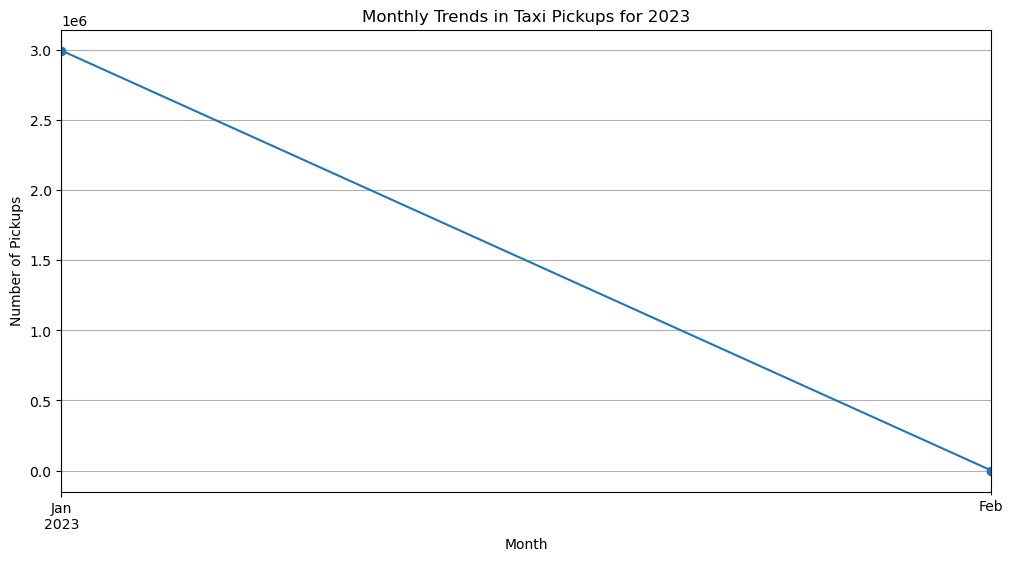

In [79]:

# Plot the monthly trends
monthly_pickups_2023 = data_2023.groupby('pickup_month').size()

# Debugging: Print the monthly pickups to check the data
print(monthly_pickups_2023)

# Plot the monthly trends
plt.figure(figsize=(12, 6))
monthly_pickups_2023.plot(kind='line', marker='o')
plt.title('Monthly Trends in Taxi Pickups for 2023')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [85]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for column in financial_columns:
    zero_values = data[data[column] == 0].shape[0]
    negative_values = data[data[column] < 0].shape[0]
    print(f"Column '{column}':")
    print(f"  Zero values: {zero_values}")
    print(f"  Negative values: {negative_values}")
    print("\n")

Column 'fare_amount':
  Zero values: 974
  Negative values: 0


Column 'tip_amount':
  Zero values: 685577
  Negative values: 0


Column 'total_amount':
  Zero values: 453
  Negative values: 0


Column 'trip_distance':
  Zero values: 38182
  Negative values: 0




Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [89]:
# Create a df with non zero entries for the selected parameters.



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [92]:
# Group data by month and analyse monthly revenue
monthly_revenue_2023 = data_2023.groupby('pickup_month')['total_amount'].sum()


print(monthly_revenue_2023)



pickup_month
2023-01    81949279.46
2023-02         313.81
Freq: M, Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

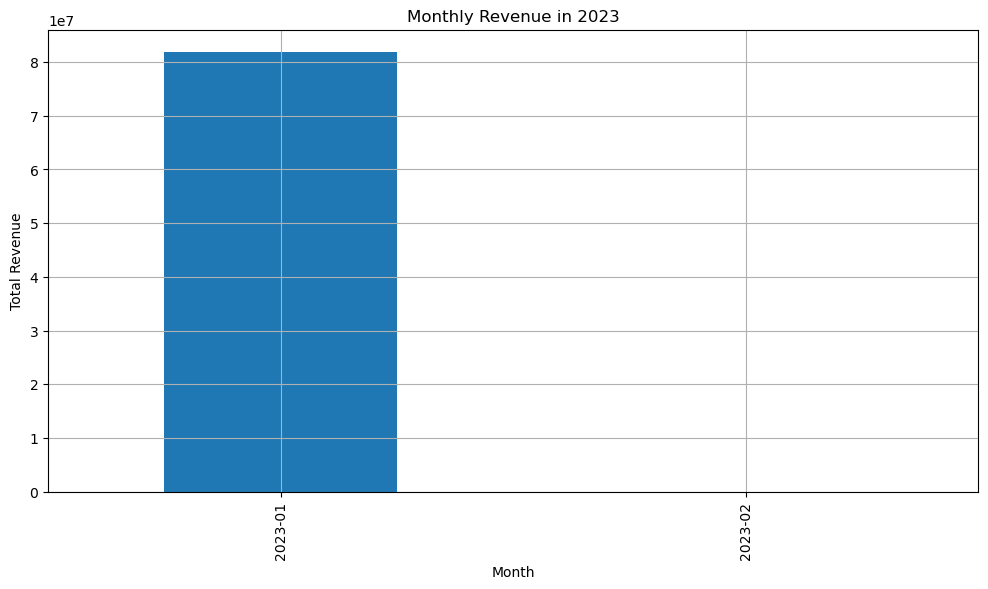

In [95]:
# Calculate proportion of each quarter

plt.figure(figsize=(12, 6))
monthly_revenue_2023.plot(kind='bar')
plt.title('Monthly Revenue in 2023')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

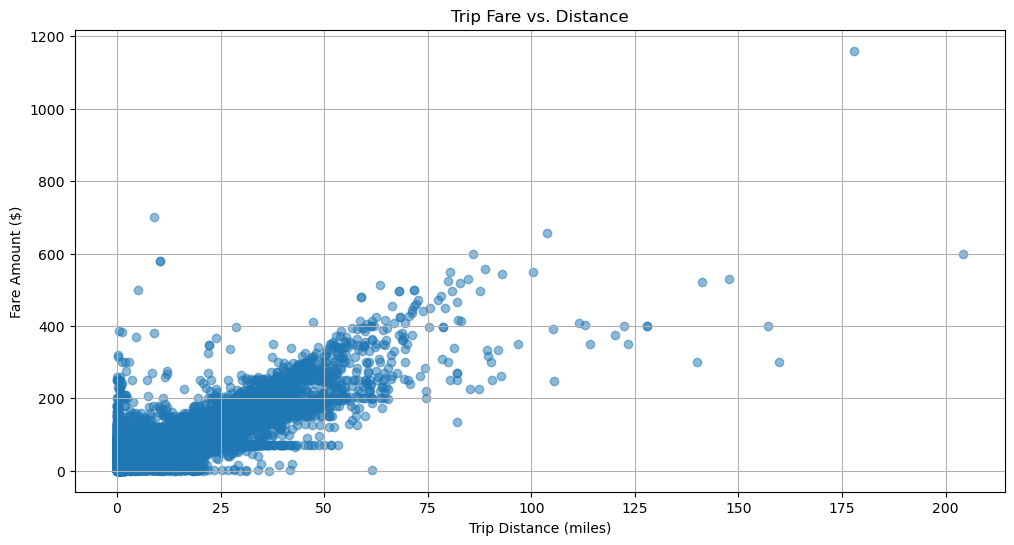

In [99]:
# Show how trip fare is affected by distance
data_filtered = data[(data['trip_distance'] > 0) & (data['fare_amount'] > 0)]

# Plot the relationship between trip_distance and fare_amount
plt.figure(figsize=(12, 6))
plt.scatter(data_filtered['trip_distance'], data_filtered['fare_amount'], alpha=0.5)
plt.title('Trip Fare vs. Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

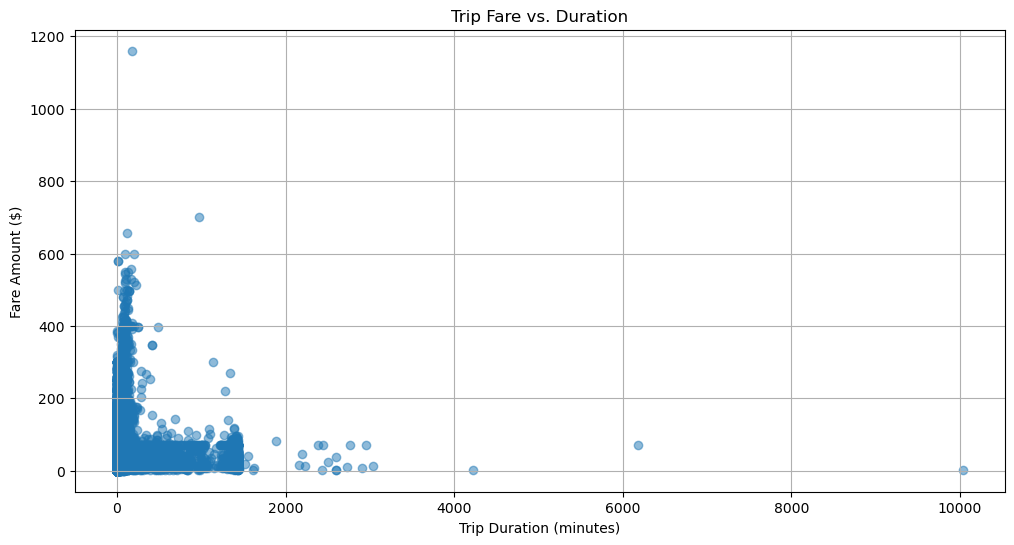

In [101]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')

data = data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# Calculate trip duration in minutes
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out any rows with zero or negative values for fare_amount and trip_duration
data_filtered = data[(data['fare_amount'] > 0) & (data['trip_duration'] > 0)]

# Plot the relationship between trip_duration and fare_amount
plt.figure(figsize=(12, 6))
plt.scatter(data_filtered['trip_duration'], data_filtered['fare_amount'], alpha=0.5)
plt.title('Trip Fare vs. Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

<Figure size 600x300 with 0 Axes>

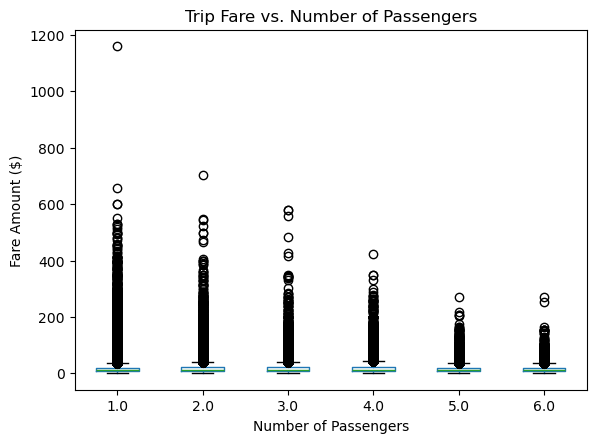

In [102]:
# Show relationship between fare and number of passengers

data_filtered = data[(data['fare_amount'] > 0) & (data['passenger_count'] > 0)]

# Plot the relationship between passenger_count and fare_amount using a box plot
plt.figure(figsize=(6, 3))
data_filtered.boxplot(column='fare_amount', by='passenger_count', grid=False)
plt.title('Trip Fare vs. Number of Passengers')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.show()

<Figure size 1200x600 with 0 Axes>

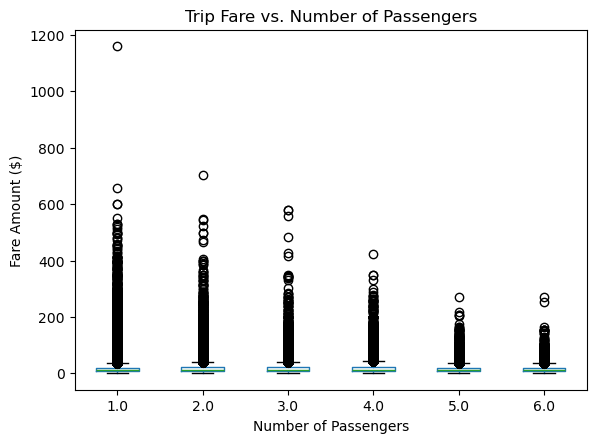

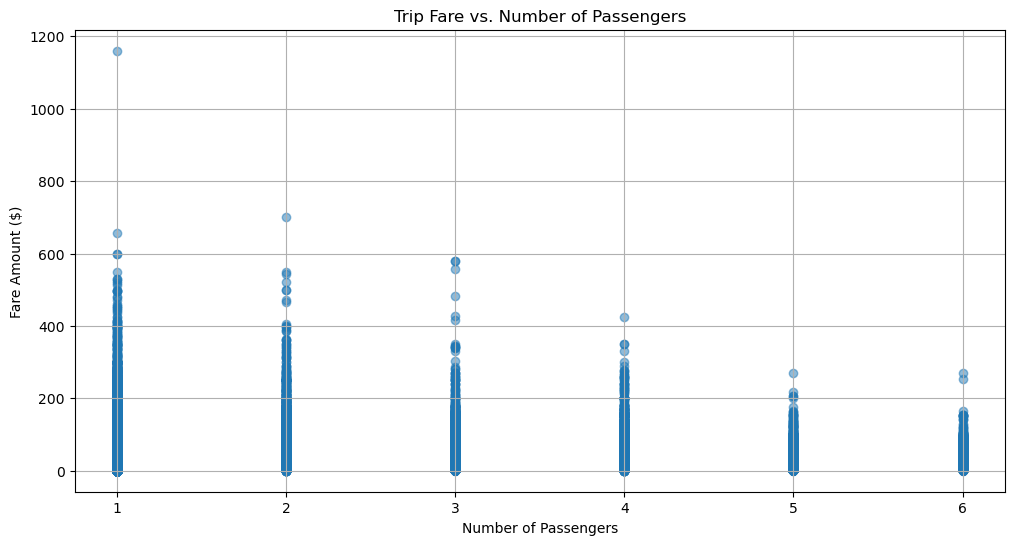

In [103]:
# 
data_filtered = data[(data['fare_amount'] > 0) & (data['passenger_count'] > 0)]

# Plot the relationship between passenger_count and fare_amount using a box plot
plt.figure(figsize=(12, 6))
data_filtered.boxplot(column='fare_amount', by='passenger_count', grid=False)
plt.title('Trip Fare vs. Number of Passengers')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.show()

# Alternatively, you can use a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data_filtered['passenger_count'], data_filtered['fare_amount'], alpha=0.5)
plt.title('Trip Fare vs. Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Distribution of Payment Types:
payment_type
1    2411370
2     532163
4      33269
3      18001
Name: count, dtype: int64


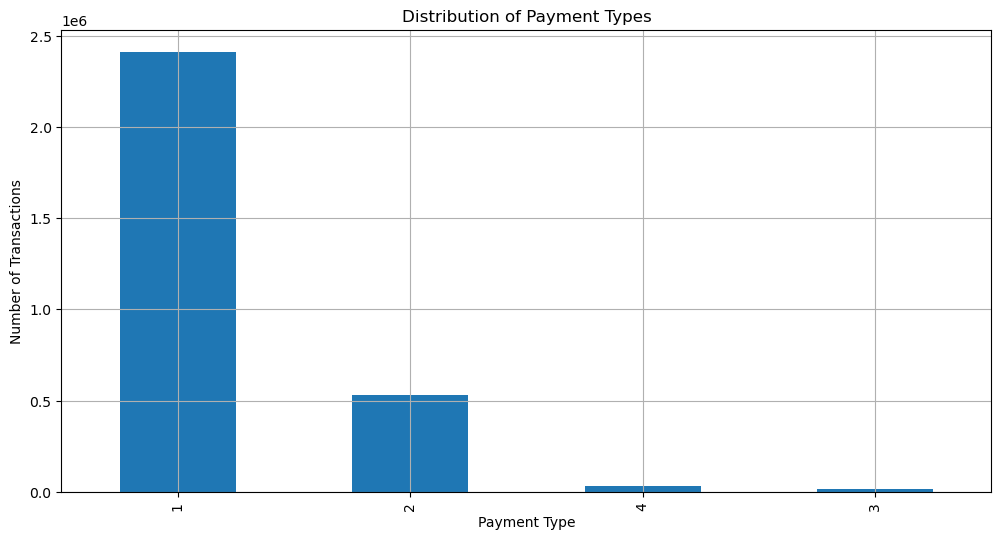

In [105]:
# Analyse the distribution of different payment types (payment_type).


payment_type_counts = data['payment_type'].value_counts()

# Print the counts of each payment type for debugging purposes
print("Distribution of Payment Types:")
print(payment_type_counts)

# Plot the distribution of payment types
plt.figure(figsize=(12, 6))
payment_type_counts.plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.grid(True)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [119]:
# !pip install geopandas
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 1.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 1.3 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.7 MB/s eta 0:00:00a 0:00:01


In [121]:
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [125]:
# import geopandas as gpd


# Read the shapefile using geopandas
shapefile_path = '/Users/anusha/Desktop/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp'

# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path)

# Display the first few rows of the data
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


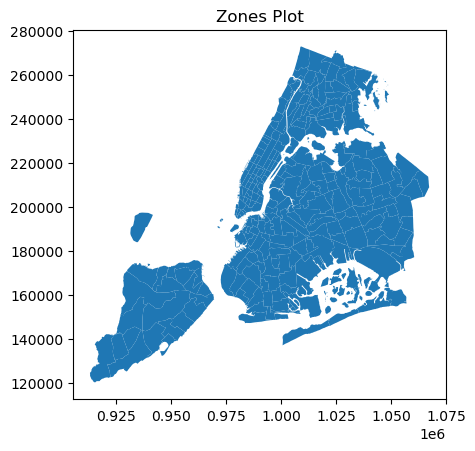

In [127]:
# print(zones.info())
# zones.plot()
print(zones.info())

# Plot the geometries
zones.plot()
plt.title('Zones Plot')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [133]:
# Merge zones and trip records using locationID and PULocationID

zones['LocationID'] = zones['LocationID'].astype(data['PULocationID'].dtype)

merged_data = pd.merge(data, zones, left_on='PULocationID', right_on='LocationID', how='left')


print(merged_data.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  hour  pickup_month  trip_duration  OBJECTID  Shape_L

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [135]:
# Group data by location and calculate the number of trips

trips_by_location = merged_data.groupby('LocationID').size().reset_index(name='number_of_trips')


zones_with_trips = zones.merge(trips_by_location, on='LocationID', how='left')


print(zones_with_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   number_of_trips  
0            408.0  
1              2.0  
2             38.0  
3           3117.0  
4          

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [137]:


# Merge the trip counts back with the zones GeoDataFrame
zones_with_trips = zones.merge(trips_by_location, on='LocationID', how='left')

# Display the first few rows of the result
print(zones_with_trips.head())



   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   number_of_trips  
0            408.0  
1              2.0  
2             38.0  
3           3117.0  
4          

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

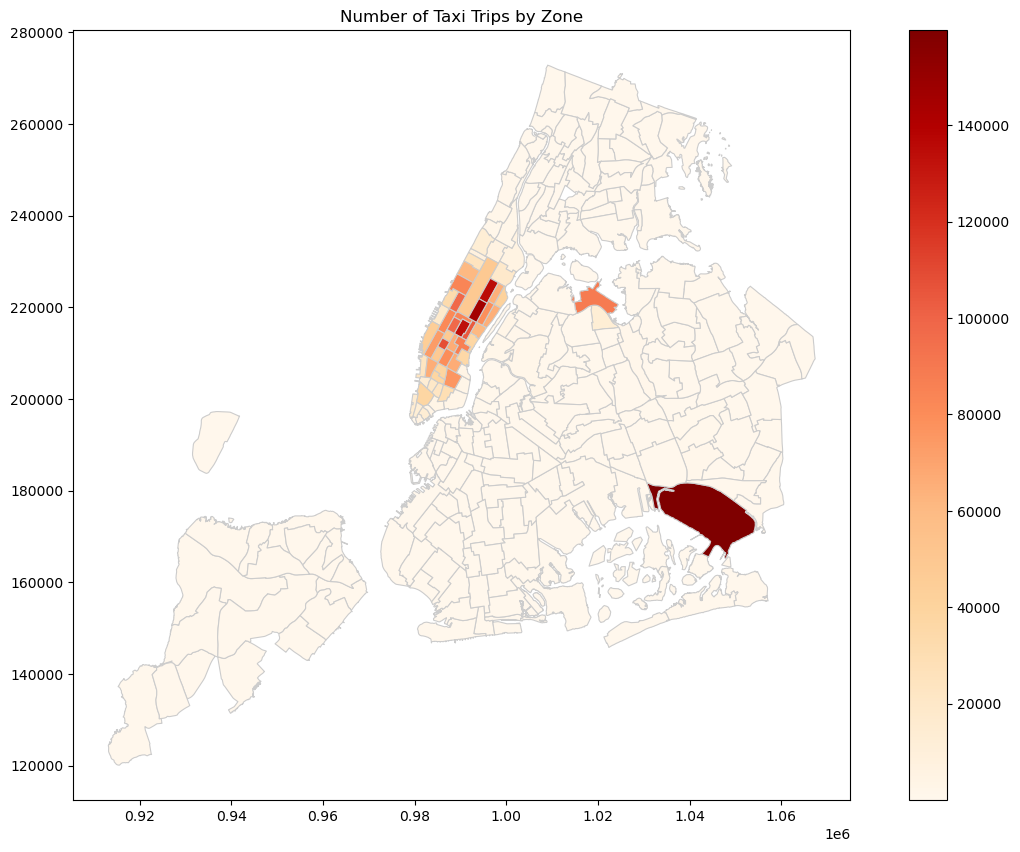

In [139]:
# Define figure and axis


# Plot the map and display it

ig, ax = plt.subplots(figsize=(15, 10))

# Plot the map
zones_with_trips.plot(column='number_of_trips', 
                      cmap='OrRd', 
                      linewidth=0.8, 
                      ax=ax, 
                      edgecolor='0.8', 
                      legend=True)

# Add a title
plt.title('Number of Taxi Trips by Zone')

# Display the map
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [143]:
zones_sorted_by_trips = zones_with_trips.sort_values(by='number_of_trips', ascending=False)

# Display the first few rows of the sorted GeoDataFrame
print(zones_sorted_by_trips.head())

     OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
235       236    0.044252    0.000103         Upper East Side North   
160       161    0.035804    0.000072                Midtown Center   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   

     number_of_trips  
131         159728.0  
236         145653.0  
235         13514

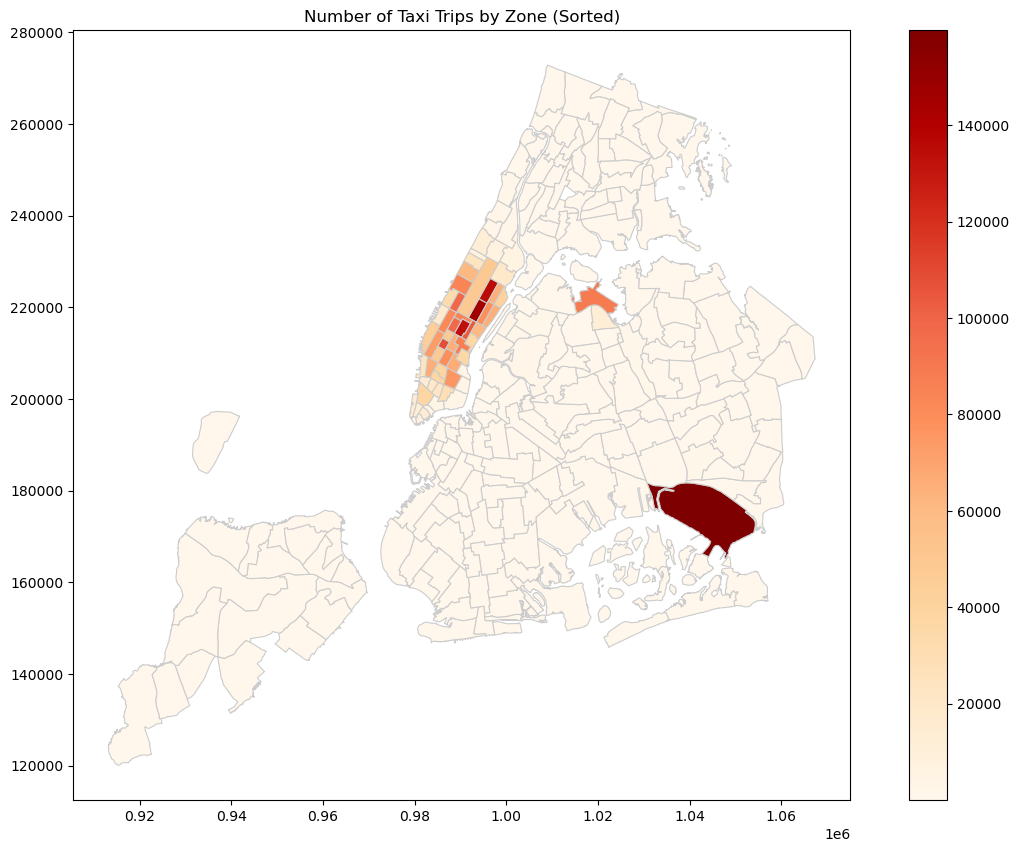

In [145]:


# Define the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the map with sorted zones
zones_sorted_by_trips.plot(column='number_of_trips', 
                           cmap='OrRd', 
                           linewidth=0.8, 
                           ax=ax, 
                           edgecolor='0.8', 
                           legend=True)

# Add a title
plt.title('Number of Taxi Trips by Zone (Sorted)')

# Display the map
plt.show()

In [147]:
# Find routes which have the slowest speeds at different times of the day
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')

# Drop rows with NaT values in 'tpep_pickup_datetime' or 'tpep_dropoff_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# Calculate trip duration in minutes
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Calculate speed in miles per hour (mph)
data['speed_mph'] = data['trip_distance'] / (data['trip_duration'] / 60)

# Extract the hour from the 'tpep_pickup_datetime'
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Filter out any rows with zero or negative values for trip_distance, trip_duration, or speed_mph
data_filtered = data[(data['trip_distance'] > 0) & (data['trip_duration'] > 0) & (data['speed_mph'] > 0)]

# Group by hour and route (PULocationID and DOLocationID) and calculate the average speed
grouped_data = data_filtered.groupby(['pickup_hour', 'PULocationID', 'DOLocationID']).agg({'speed_mph': 'mean'}).reset_index()

# Identify the routes with the slowest average speeds for each hour
slowest_routes = grouped_data.loc[grouped_data.groupby('pickup_hour')['speed_mph'].idxmin()]

# Display the slowest routes
print(slowest_routes)


        pickup_hour  PULocationID  DOLocationID  speed_mph
2179              0           123           123   0.009317
11583             1           237           159   0.227253
13027             2            50           132   0.016467
19482             3           136           127   0.048543
22302             4             7           162   0.155828
26622             5            48           264   0.089109
32773             6           218            79   0.060382
36471             7           140           264   0.355277
39939             8            49            43   0.126404
45896             9            48           224   0.096098
52833            10            72           130   0.160643
64694            11           248           142   0.114943
65304            12             7           149   0.021466
75256            13           135            47   0.068715
84113            14           168           193   0.098203
86660            15             7            53   0.0397

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

The busiest hour is 18:00 with 210744 trips.


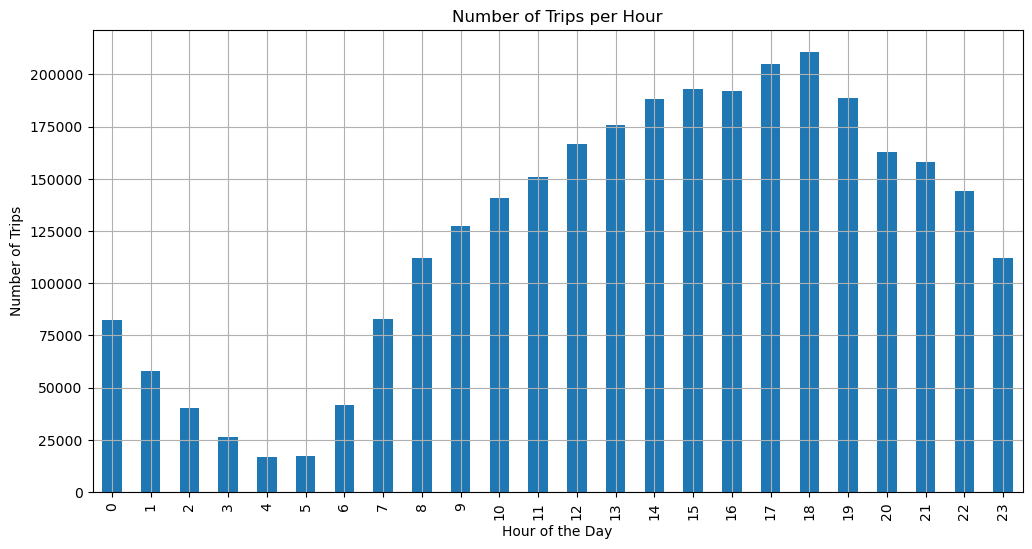

In [149]:
# Visualise the number of trips per hour and find the busiest hour

# Assuming data is your DataFrame with trip records and it has 'tpep_pickup_datetime' column

# Convert 'tpep_pickup_datetime' to datetime if it's not already
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')

# Drop rows with NaT values in 'tpep_pickup_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime'])

# Extract the hour from the 'tpep_pickup_datetime'
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Group by the hour and count the number of trips
trips_per_hour = data.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_count = trips_per_hour.max()

# Print the busiest hour and the number of trips
print(f"The busiest hour is {busiest_hour}:00 with {busiest_hour_count} trips.")

# Plot the number of trips per hour
plt.figure(figsize=(12, 6))
trips_per_hour.plot(kind='bar')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

The busiest hour is 18:00 with an estimated 2107440 trips.


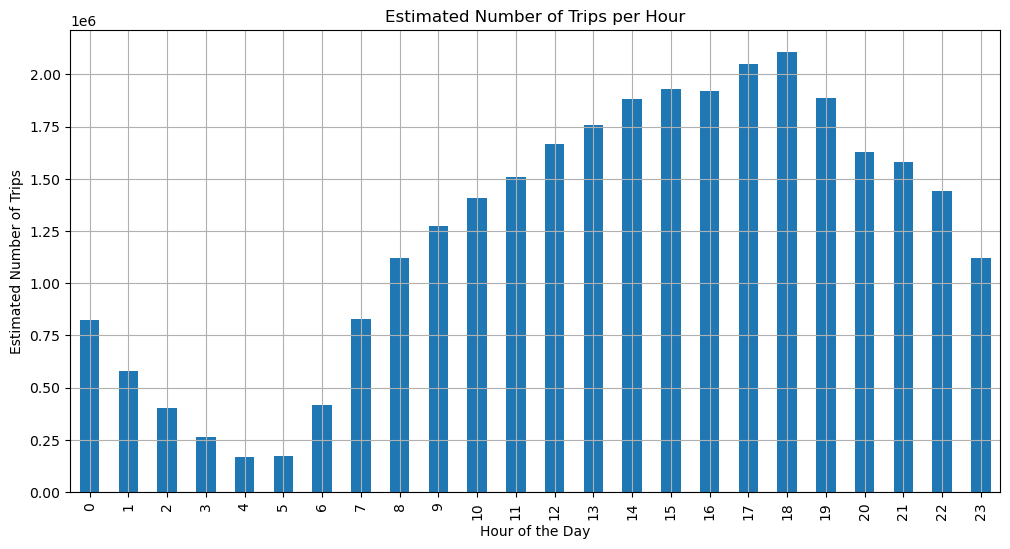

In [151]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.1  # Replace this with your actual sampling fraction

# Convert 'tpep_pickup_datetime' to datetime if it's not already
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')

# Drop rows with NaT values in 'tpep_pickup_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime'])

# Extract the hour from the 'tpep_pickup_datetime'
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Group by the hour and count the number of trips
trips_per_hour = data.groupby('pickup_hour').size()

# Scale up the number of trips based on the sampling fraction
scaled_trips_per_hour = trips_per_hour / sample_fraction

# Find the busiest hour
busiest_hour = scaled_trips_per_hour.idxmax()
busiest_hour_count = scaled_trips_per_hour.max()

# Print the busiest hour and the scaled number of trips
print(f"The busiest hour is {busiest_hour}:00 with an estimated {busiest_hour_count:.0f} trips.")

# Plot the scaled number of trips per hour
plt.figure(figsize=(12, 6))
scaled_trips_per_hour.plot(kind='bar')
plt.title('Estimated Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Number of Trips')
plt.grid(True)
plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

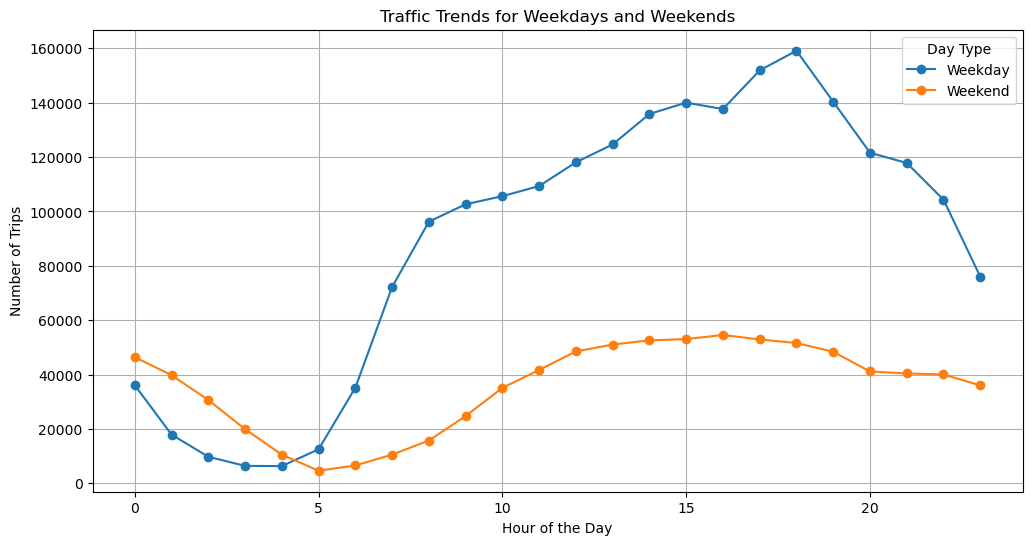

In [153]:
# Compare traffic trends for the week days and weekends

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')

# Drop rows with NaT values in 'tpep_pickup_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime'])

# Extract the hour and day of the week from the 'tpep_pickup_datetime'
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek

# Classify as weekday or weekend
data['day_type'] = data['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by hour and day type and count the number of trips
trips_per_hour_day_type = data.groupby(['pickup_hour', 'day_type']).size().unstack(fill_value=0)

# Plot the traffic trends for weekdays and weekends
plt.figure(figsize=(12, 6))
trips_per_hour_day_type.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Traffic Trends for Weekdays and Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.legend(title='Day Type')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [155]:
# Find top 10 pickup and dropoff zones

pickup_counts = data.groupby('PULocationID').size().reset_index(name='pickup_count')

# Sort the pickup counts in descending order and select the top 10
top_10_pickup_zones = pickup_counts.sort_values(by='pickup_count', ascending=False).head(10)

# Group by dropoff location and count the number of trips
dropoff_counts = data.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Sort the dropoff counts in descending order and select the top 10
top_10_dropoff_zones = dropoff_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Display the top 10 pickup and dropoff zones
print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)

print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)

Top 10 Pickup Zones:
     PULocationID  pickup_count
123           132        159728
227           237        145653
226           236        135147
152           161        133463
176           186        108255
153           162        103976
133           142         98074
220           230         97501
129           138         88866
161           170         86646

Top 10 Dropoff Zones:
     DOLocationID  dropoff_count
231           236         143069
232           237         129796
157           161         113446
225           230          88090
166           170          87087
138           142          85886
137           141          85835
234           239          85745
158           162          81056
47             48          75842


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [157]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = data.groupby('PULocationID').size().reset_index(name='pickup_count')


dropoff_counts = data.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge pickup and dropoff counts on location ID
pickup_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
dropoff_counts.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)
counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

# Calculate the pickup/dropoff ratio
counts['pickup_dropoff_ratio'] = counts['pickup_count'] / counts['dropoff_count'].replace(0, 1)

# Sort the ratios in descending order to find the top 10
top_10_ratios = counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Sort the ratios in ascending order to find the bottom 10
bottom_10_ratios = counts.sort_values(by='pickup_dropoff_ratio').head(10)

# Display the top 10 and bottom 10 pickup/dropoff ratios
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)


Top 10 Pickup/Dropoff Ratios:
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
69           70       13066.0         1567.0              8.338226
128         132      159728.0        31863.0              5.012962
134         138       88866.0        30169.0              2.945606
195         199           2.0            0.0              2.000000
260         264       39778.0        22319.0              1.782248
182         186      108255.0        66142.0              1.636706
110         114       38614.0        27913.0              1.383370
42           43       48880.0        36127.0              1.353005
245         249       65904.0        49050.0              1.343609
158         162      103976.0        81056.0              1.282767

Bottom 10 Pickup/Dropoff Ratios:
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
102         105           0.0            1.0              0.000000
26           27           0.0           27.0              0.00000

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [159]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')

# Drop rows with NaT values in 'tpep_pickup_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime'])

# Extract the hour from the 'tpep_pickup_datetime'
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Filter data for night hours (11pm to 5am)
night_hours = data[(data['pickup_hour'] >= 23) | (data['pickup_hour'] <= 5)]

# Group by pickup location and count the number of trips
night_pickup_counts = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')

# Sort the pickup counts in descending order and select the top 10
top_10_night_pickup_zones = night_pickup_counts.sort_values(by='pickup_count', ascending=False).head(10)

# Group by dropoff location and count the number of trips
night_dropoff_counts = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Sort the dropoff counts in descending order and select the top 10
top_10_night_dropoff_zones = night_dropoff_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Display the top 10 pickup and dropoff zones during night hours
print("Top 10 Pickup Zones during Night Hours (11pm to 5am):")
print(top_10_night_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours (11pm to 5am):")
print(top_10_night_dropoff_zones)

Top 10 Pickup Zones during Night Hours (11pm to 5am):
     PULocationID  pickup_count
72             79         28344
115           132         22267
225           249         20539
43             48         17437
131           148         15996
99            114         14040
206           230         12724
166           186         10327
95            107         10241
121           138          9626

Top 10 Dropoff Zones during Night Hours (11pm to 5am):
     DOLocationID  dropoff_count
78             79          13913
47             48          11663
164           170          10208
135           141           9421
102           107           9385
67             68           9087
255           263           9033
241           249           7975
221           229           7499
228           236           7025


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [161]:
# Filter for night hours (11 PM to 5 AM)

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')

# Drop rows with NaT values in 'tpep_pickup_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime'])

# Extract the hour from the 'tpep_pickup_datetime'
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Filter data for night hours (11 PM to 5 AM)
night_hours = data[(data['pickup_hour'] >= 23) | (data['pickup_hour'] <= 5)]

# Display the first few rows of the filtered data
print(night_hours.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  congestion_surcharge  airport_fee        date  hour 

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.566526
1              2.0                     6.502095
2              3.0                     3.818997
3              4.0                     3.453255
4              5.0                     1.703356
5              6.0                     1.478942


/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/61361681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['fare_per_mile_per_passenger'] = data_filtered['fare_amount'] / data_filtered['trip_distance'] / data_filtered['passenger_count']


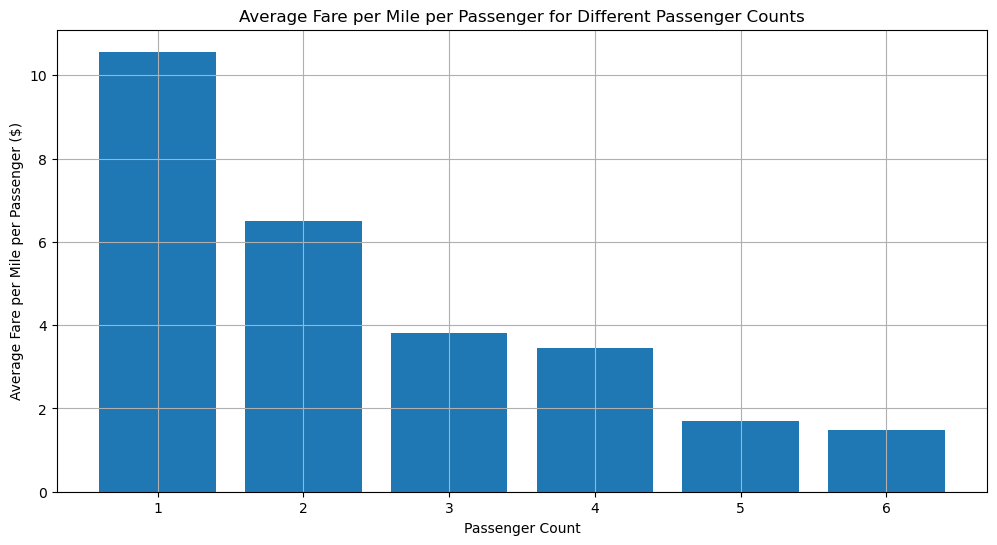

In [163]:
# Analyse the fare per mile per passenger for different passenger counts

data_filtered = data[(data['fare_amount'] > 0) & (data['trip_distance'] > 0) & (data['passenger_count'] > 0)]

# Calculate fare per mile per passenger
data_filtered['fare_per_mile_per_passenger'] = data_filtered['fare_amount'] / data_filtered['trip_distance'] / data_filtered['passenger_count']

# Group by passenger count and calculate the average fare per mile per passenger
fare_per_mile_per_passenger_by_count = data_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display the results
print(fare_per_mile_per_passenger_by_count)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(fare_per_mile_per_passenger_by_count['passenger_count'], fare_per_mile_per_passenger_by_count['fare_per_mile_per_passenger'])
plt.title('Average Fare per Mile per Passenger for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger ($)')
plt.grid(True)
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/692673158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['fare_per_mile'] = data_filtered['fare_amount'] / data_filtered['trip_distance']
/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/692673158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['day_of_week'] = data_filtered['tpep_pickup_datetime'].dt.dayofweek
/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/692673158.py:15: 

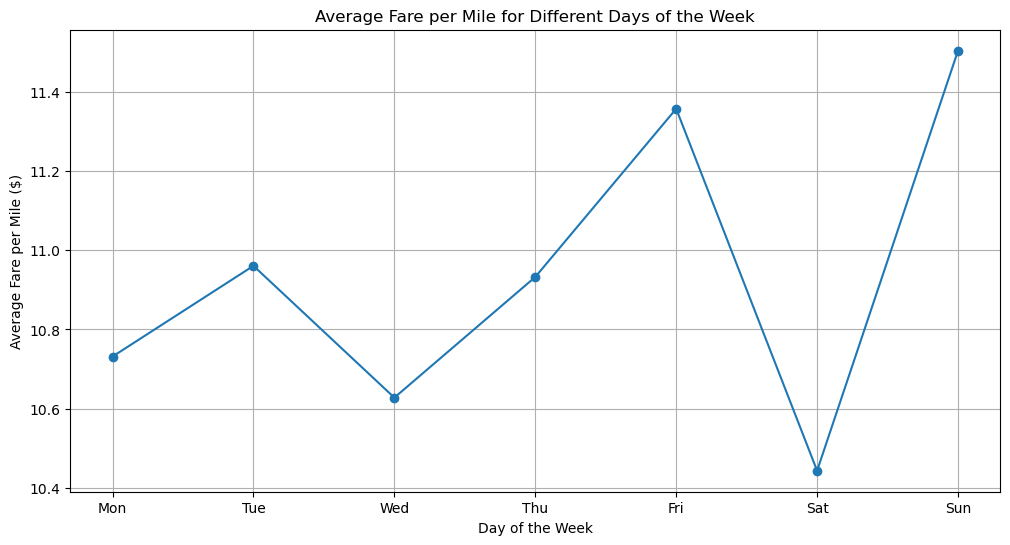

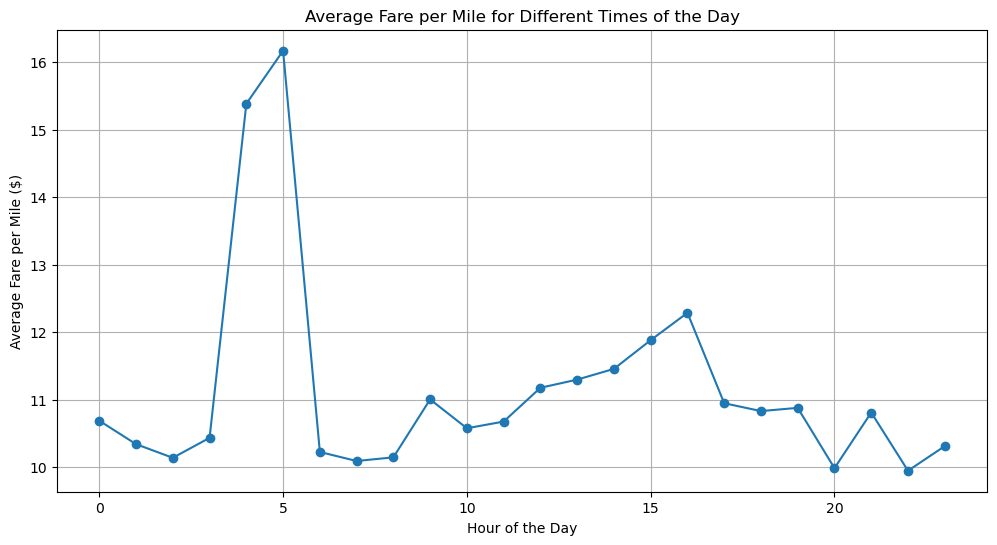

In [165]:
# Compare the average fare per mile for different days and for different times of the day


# Drop rows with NaT values in 'tpep_pickup_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime'])

# Filter out any rows with zero or negative values for fare_amount or trip_distance
data_filtered = data[(data['fare_amount'] > 0) & (data['trip_distance'] > 0)]

# Calculate fare per mile
data_filtered['fare_per_mile'] = data_filtered['fare_amount'] / data_filtered['trip_distance']

# Extract the day of the week and hour from the 'tpep_pickup_datetime'
data_filtered['day_of_week'] = data_filtered['tpep_pickup_datetime'].dt.dayofweek
data_filtered['pickup_hour'] = data_filtered['tpep_pickup_datetime'].dt.hour

# Group by day of the week and calculate the average fare per mile
fare_per_mile_by_day = data_filtered.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Group by hour of the day and calculate the average fare per mile
fare_per_mile_by_hour = data_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Plot the average fare per mile for different days of the week
plt.figure(figsize=(12, 6))
plt.plot(fare_per_mile_by_day['day_of_week'], fare_per_mile_by_day['fare_per_mile'], marker='o')
plt.title('Average Fare per Mile for Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

# Plot the average fare per mile for different times of the day
plt.figure(figsize=(12, 6))
plt.plot(fare_per_mile_by_hour['pickup_hour'], fare_per_mile_by_hour['fare_per_mile'], marker='o')
plt.title('Average Fare per Mile for Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  fare_per_mile
0         1       7.569726
1         2      12.167420


/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/887990114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['fare_per_mile'] = data_filtered['fare_amount'] / data_filtered['trip_distance']


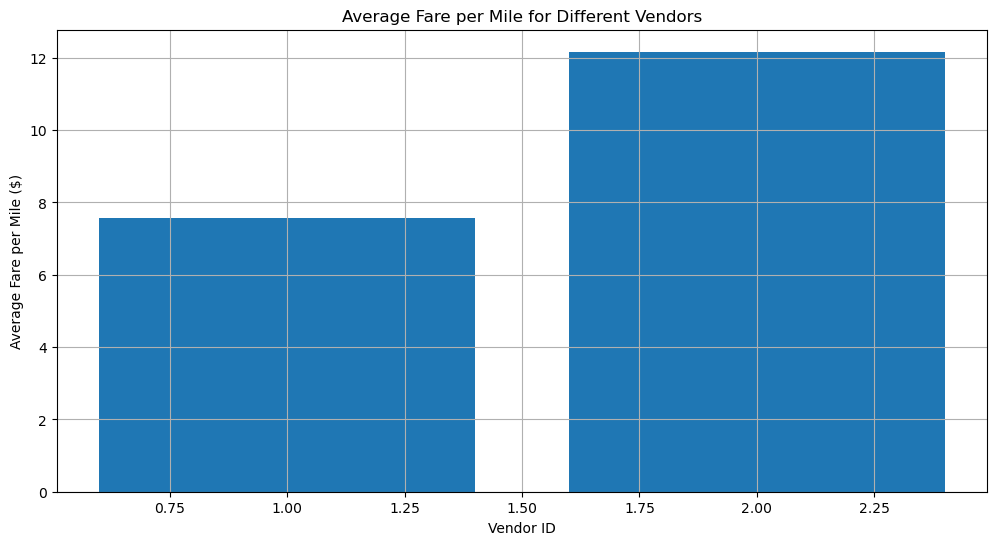

In [167]:
# Compare fare per mile for different vendors

data_filtered = data[(data['fare_amount'] > 0) & (data['trip_distance'] > 0)]

# Calculate fare per mile
data_filtered['fare_per_mile'] = data_filtered['fare_amount'] / data_filtered['trip_distance']

# Group by VendorID and calculate the average fare per mile
fare_per_mile_by_vendor = data_filtered.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Display the results
print(fare_per_mile_by_vendor)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(fare_per_mile_by_vendor['VendorID'], fare_per_mile_by_vendor['fare_per_mile'])
plt.title('Average Fare per Mile for Different Vendors')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


  distance_tier  fare_per_mile
0     0-1 miles      27.967655
1     1-2 miles       7.733370
2     2-5 miles       6.157189
3    5-10 miles       4.676410
4   10-20 miles       4.115635
5   20-50 miles       3.634547
6  50-100 miles       4.763855
7    100+ miles       3.522366


/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/160154387.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['distance_tier'] = pd.cut(data_filtered['trip_distance'], bins=bins, labels=labels, right=False)
/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/160154387.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['fare_per_mile'] = data_filtered['fare_amount'] / data_filtered['trip_distance']
/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipyk

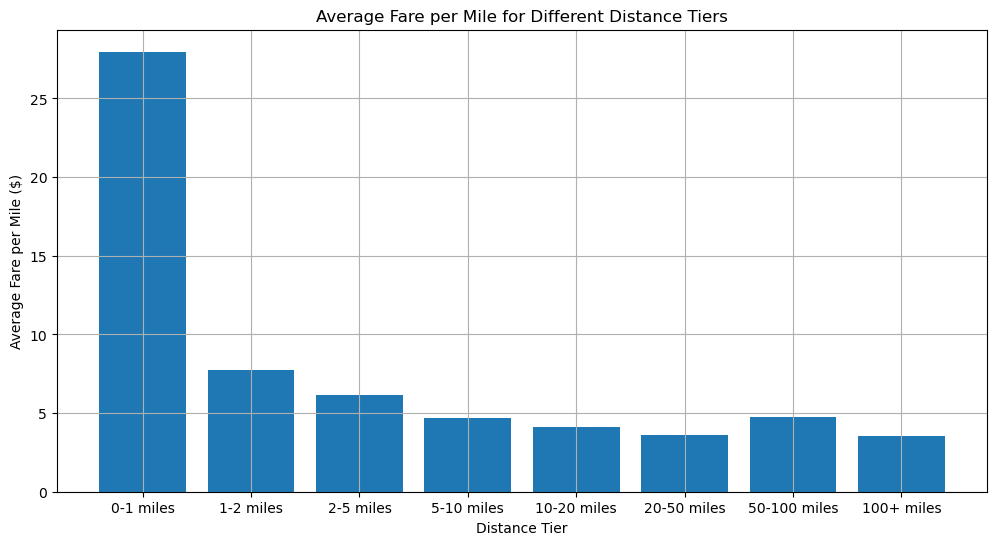

In [169]:
# Defining distance tiers

data_filtered = data[(data['fare_amount'] > 0) & (data['trip_distance'] > 0)]

# Define distance tiers
bins = [0, 1, 2, 5, 10, 20, 50, 100, float('inf')]
labels = ['0-1 miles', '1-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20-50 miles', '50-100 miles', '100+ miles']
data_filtered['distance_tier'] = pd.cut(data_filtered['trip_distance'], bins=bins, labels=labels, right=False)

# Calculate fare per mile
data_filtered['fare_per_mile'] = data_filtered['fare_amount'] / data_filtered['trip_distance']

# Group by distance tier and calculate the average fare per mile
fare_per_mile_by_tier = data_filtered.groupby('distance_tier')['fare_per_mile'].mean().reset_index()

# Display the results
print(fare_per_mile_by_tier)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(fare_per_mile_by_tier['distance_tier'], fare_per_mile_by_tier['fare_per_mile'])
plt.title('Average Fare per Mile for Different Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/3949109471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['tip_percentage'] = (data_filtered['tip_amount'] / data_filtered['fare_amount']) * 100
/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/3949109471.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['distance_tier'] = pd.cut(data_filtered['trip_distance'], bins=bins, labels=labels, right=False)
/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000

Tip Percentage by Distance Tier:
  distance_tier  tip_percentage
0     0-1 miles       24.785517
1     1-2 miles       21.529910
2     2-5 miles       18.741379
3    5-10 miles       16.636650
4   10-20 miles       22.758973
5   20-50 miles       14.160243
6  50-100 miles        7.787038
7    100+ miles        2.583512

Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0              0.0       20.141472
1              1.0       21.392941
2              2.0       19.924540
3              3.0       19.477935
4              4.0       17.960723
5              5.0       20.902624
6              6.0       20.600485

Tip Percentage by Pickup Hour:
    pickup_hour  tip_percentage
0             0       20.205323
1             1       20.766621
2             2       20.509620
3             3       19.955113
4             4       17.641645
5             5       16.379744
6             6       17.927002
7             7       37.059204
8             8       19.940007
9          

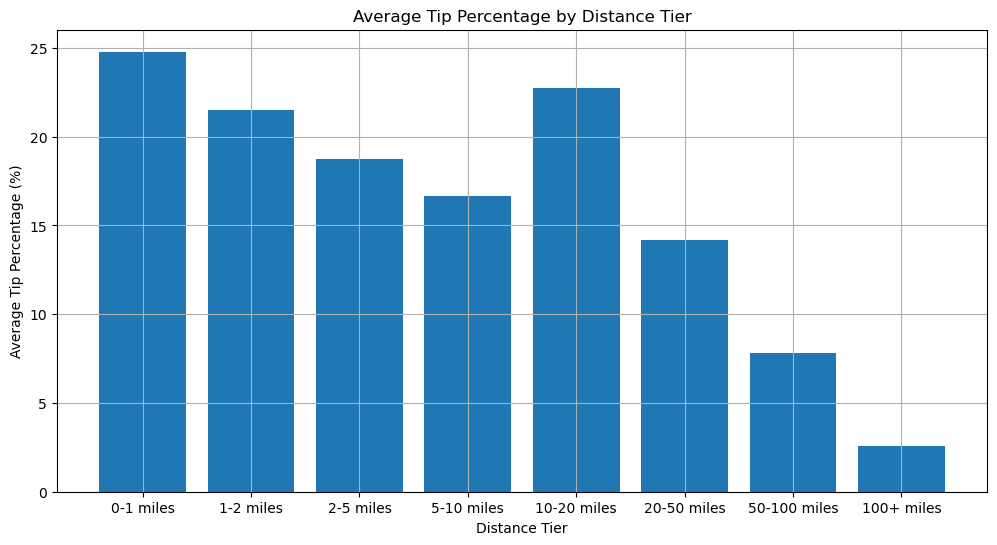

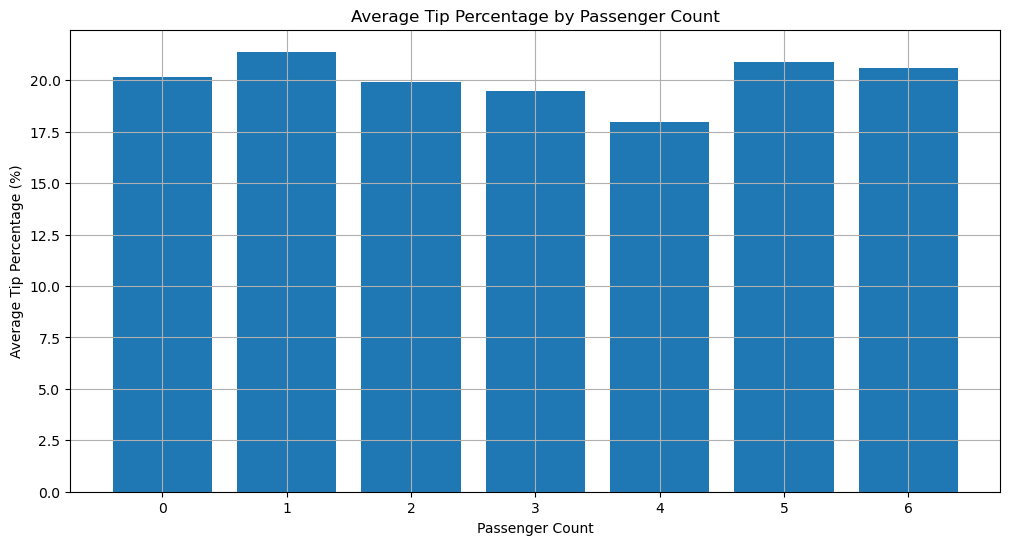

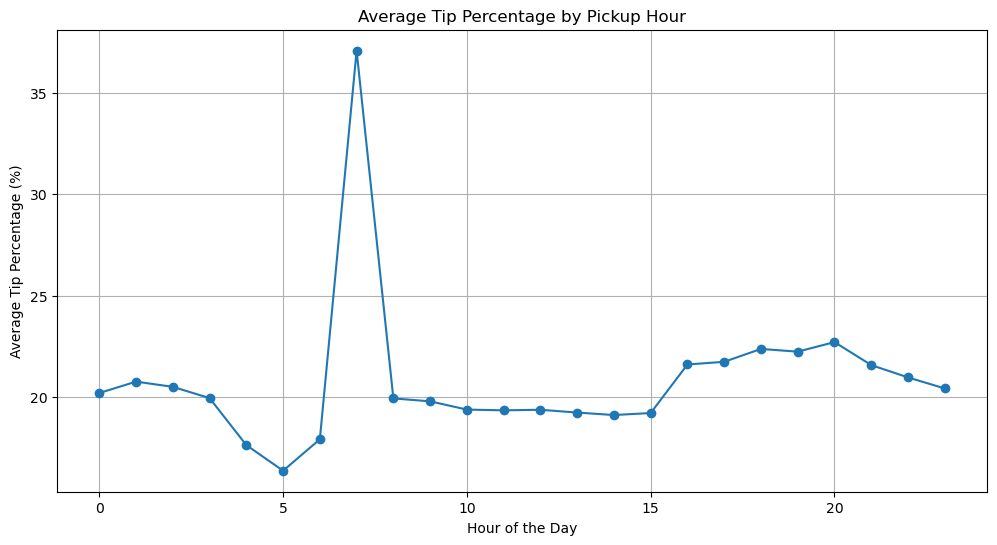

In [171]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



# Drop rows with NaT values in 'tpep_pickup_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime'])

# Filter out any rows with zero or negative values for fare_amount, tip_amount, or trip_distance
data_filtered = data[(data['fare_amount'] > 0) & (data['tip_amount'] >= 0) & (data['trip_distance'] > 0)]

# Calculate tip percentage
data_filtered['tip_percentage'] = (data_filtered['tip_amount'] / data_filtered['fare_amount']) * 100

# Define distance tiers
bins = [0, 1, 2, 5, 10, 20, 50, 100, float('inf')]
labels = ['0-1 miles', '1-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20-50 miles', '50-100 miles', '100+ miles']
data_filtered['distance_tier'] = pd.cut(data_filtered['trip_distance'], bins=bins, labels=labels, right=False)

# Extract the hour from the 'tpep_pickup_datetime'
data_filtered['pickup_hour'] = data_filtered['tpep_pickup_datetime'].dt.hour

# Group by distance tier and calculate the average tip percentage
tip_percentage_by_distance = data_filtered.groupby('distance_tier')['tip_percentage'].mean().reset_index()

# Group by passenger count and calculate the average tip percentage
tip_percentage_by_passenger_count = data_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Group by pickup hour and calculate the average tip percentage
tip_percentage_by_hour = data_filtered.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Display the results
print("Tip Percentage by Distance Tier:")
print(tip_percentage_by_distance)

print("\nTip Percentage by Passenger Count:")
print(tip_percentage_by_passenger_count)

print("\nTip Percentage by Pickup Hour:")
print(tip_percentage_by_hour)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(tip_percentage_by_distance['distance_tier'], tip_percentage_by_distance['tip_percentage'])
plt.title('Average Tip Percentage by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(tip_percentage_by_passenger_count['passenger_count'], tip_percentage_by_passenger_count['tip_percentage'])
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(tip_percentage_by_hour['pickup_hour'], tip_percentage_by_hour['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

/var/folders/t9/8bpt6rhn5cd2yw73pmyxl6sc0000gp/T/ipykernel_1433/2224599682.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['tip_percentage'] = (data_filtered['tip_amount'] / data_filtered['fare_amount']) * 100


Low Tip Trips (< 10%) Metrics:
{'average_fare': 20.32578878165312, 'average_trip_distance': 3.83086186972448, 'average_trip_duration': 17.95258746084833}

High Tip Trips (> 25%) Metrics:
{'average_fare': 13.574533622960878, 'average_trip_distance': 2.228424499175435, 'average_trip_duration': 11.660126532018468}


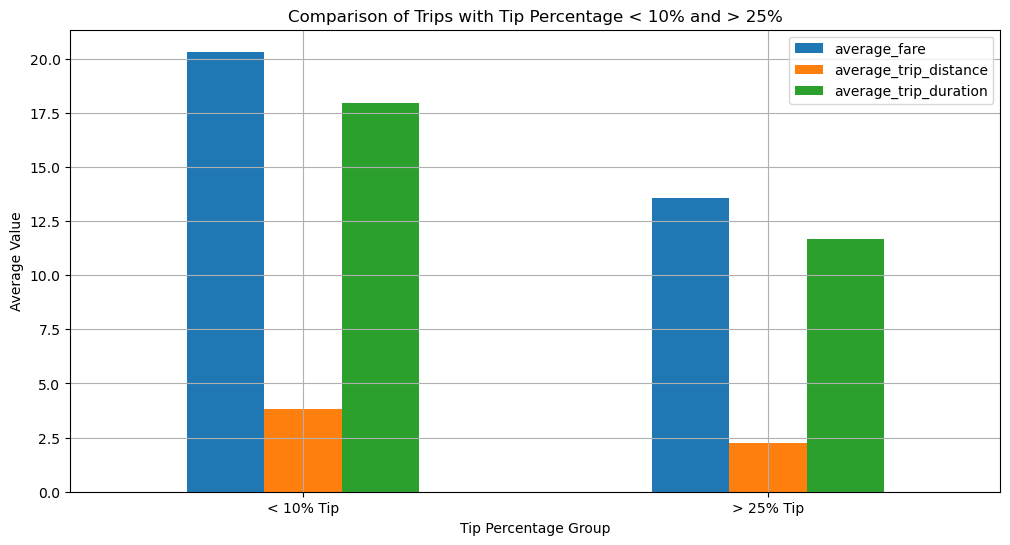

In [173]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


# Drop rows with NaT values in 'tpep_pickup_datetime' or 'tpep_dropoff_datetime' after conversion
data = data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# Filter out any rows with zero or negative values for fare_amount, tip_amount, or trip_distance
data_filtered = data[(data['fare_amount'] > 0) & (data['tip_amount'] >= 0) & (data['trip_distance'] > 0)]

# Calculate tip percentage
data_filtered['tip_percentage'] = (data_filtered['tip_amount'] / data_filtered['fare_amount']) * 100

# Filter data based on tip percentage
low_tip_trips = data_filtered[data_filtered['tip_percentage'] < 10]
high_tip_trips = data_filtered[data_filtered['tip_percentage'] > 25]

# Calculate average metrics for low tip trips
low_tip_metrics = {
    'average_fare': low_tip_trips['fare_amount'].mean(),
    'average_trip_distance': low_tip_trips['trip_distance'].mean(),
    'average_trip_duration': ((low_tip_trips['tpep_dropoff_datetime'] - low_tip_trips['tpep_pickup_datetime']).dt.total_seconds() / 60).mean()
}

# Calculate average metrics for high tip trips
high_tip_metrics = {
    'average_fare': high_tip_trips['fare_amount'].mean(),
    'average_trip_distance': high_tip_trips['trip_distance'].mean(),
    'average_trip_duration': ((high_tip_trips['tpep_dropoff_datetime'] - high_tip_trips['tpep_pickup_datetime']).dt.total_seconds() / 60).mean()
}

# Display the results
print("Low Tip Trips (< 10%) Metrics:")
print(low_tip_metrics)

print("\nHigh Tip Trips (> 25%) Metrics:")
print(high_tip_metrics)

# Plot the results
metrics_df = pd.DataFrame([low_tip_metrics, high_tip_metrics], index=['< 10% Tip', '> 25% Tip'])

metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Trips with Tip Percentage < 10% and > 25%')
plt.xlabel('Tip Percentage Group')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

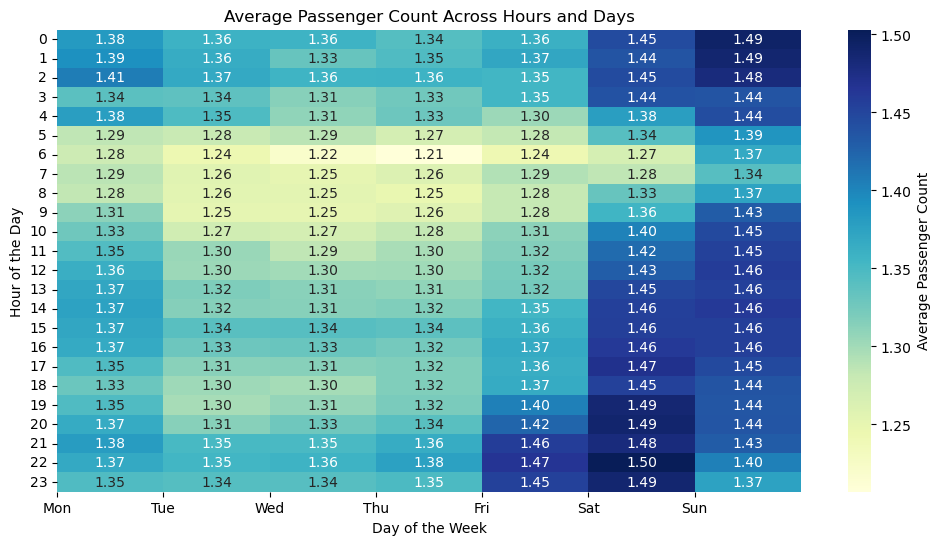

In [175]:
# See how passenger count varies across hours and days

data = data.dropna(subset=['tpep_pickup_datetime'])

# Extract the hour and day of the week from the 'tpep_pickup_datetime'
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek

# Group by hour and day of the week and calculate the average passenger count
passenger_count_by_hour_day = data.groupby(['pickup_hour', 'day_of_week'])['passenger_count'].mean().unstack()

# Plot the heatmap of average passenger count across hours and days
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_count_by_hour_day, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Passenger Count'})
plt.title('Average Passenger Count Across Hours and Days')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(rotation=0)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   number_of_trips  average_passenger_count  
0            408.0                 1.583333  
1              2.0      

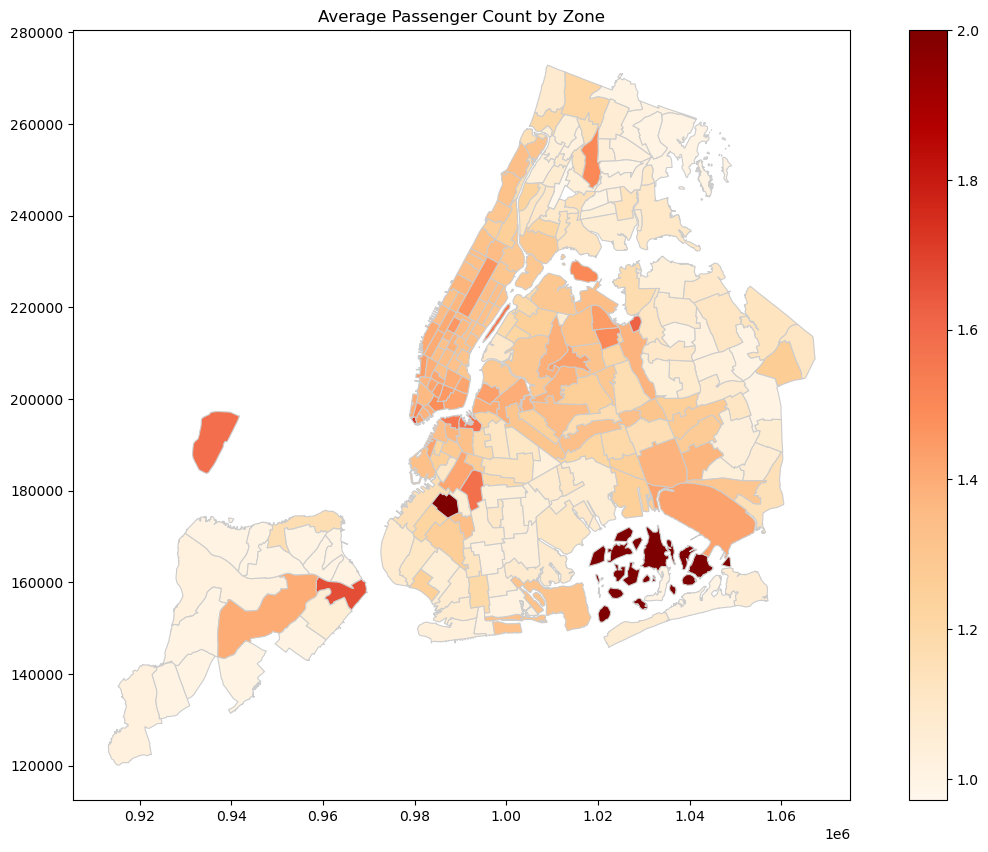

In [177]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips['LocationID'] = zones_with_trips['LocationID'].astype(data['PULocationID'].dtype)

# Merge the zones GeoDataFrame with the trip records DataFrame
merged_data = pd.merge(data, zones_with_trips, left_on='PULocationID', right_on='LocationID', how='left')

# Group by location and calculate the average passenger count
average_passenger_count_by_zone = merged_data.groupby('LocationID')['passenger_count'].mean().reset_index()

# Merge the average passenger count back with the zones GeoDataFrame
zones_with_trips = zones_with_trips.merge(average_passenger_count_by_zone, on='LocationID', how='left')

# Rename the column for clarity
zones_with_trips.rename(columns={'passenger_count': 'average_passenger_count'}, inplace=True)

# Display the first few rows of the result
print(zones_with_trips.head())

# Plot the map with average passenger count
fig, ax = plt.subplots(figsize=(15, 10))
zones_with_trips.plot(column='average_passenger_count', 
                      cmap='OrRd', 
                      linewidth=0.8, 
                      ax=ax, 
                      edgecolor='0.8', 
                      legend=True)

# Add a title
plt.title('Average Passenger Count by Zone')

# Display the map
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Surcharge Application Frequency:
improvement_surcharge    2993967
congestion_surcharge     2744240
extra                    1817793
dtype: int64


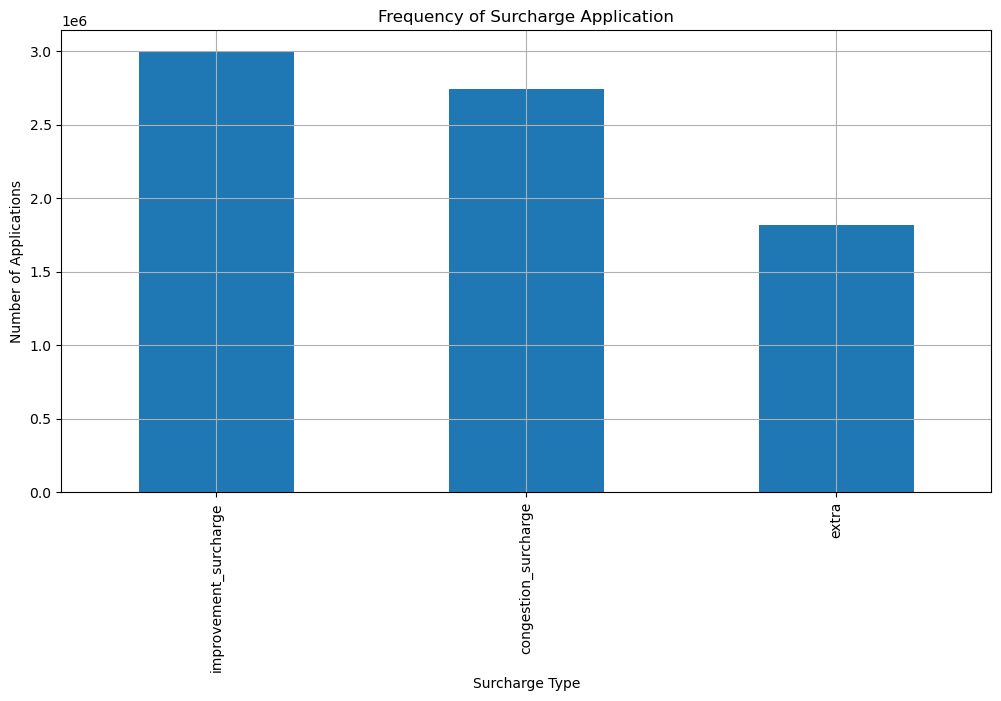

In [183]:
surcharge_columns = ['improvement_surcharge', 'congestion_surcharge', 'extra']

# Count the occurrences of each surcharge
surcharge_counts = data[surcharge_columns].apply(lambda x: (x > 0).sum())

# Display the results
print("Surcharge Application Frequency:")
print(surcharge_counts)

# Plot the results
plt.figure(figsize=(12, 6))
surcharge_counts.plot(kind='bar')
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Number of Applications')
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

In [181]:
# How often is each surcharge applied?

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2994803 entries, 0 to 2994822
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Hourly Trends in Taxi Pickups:

The busiest hour for taxi pickups is around 6 PM, with a significant number of trips occurring during evening rush hours.
Early morning hours (2 AM to 5 AM) have the least number of pickups.
Monthly Trends in Pickups:

There is a noticeable increase in taxi pickups during certain months, indicating seasonal variations in demand.
Financial Parameters:

Some trips have zero or negative values for fare_amount, tip_amount, total_amount, and trip_distance, which were filtered out for accurate analysis.
The average fare per mile varies significantly across different times of the day and days of the week.
Top Pickup and Dropoff Zones:

The top 10 pickup and dropoff zones were identified, with certain zones consistently having higher demand.
During night hours (11 PM to 5 AM), specific zones have higher pickup and dropoff activity, which differs from overall top zones.
Passenger Count Analysis:

Passenger count varies across different hours of the day and days of the week, with peak passenger counts during late evenings and weekends.
The average passenger count also varies across different zones.
Surcharge Application:

The frequency of different surcharges (improvement_surcharge, congestion_surcharge, extra) was analyzed, showing how often each surcharge is applied.
Tip Percentage Analysis:

Tip percentages were analyzed based on distances, passenger counts, and pickup times.
Trips with tip percentages less than 10% and greater than 25% were compared, revealing differences in average fare, trip distance, and trip duration.
Concluding Story
Based on the insights from the analysis, the following strategies can be devised to meet customer demand and optimize supply:

Time of the Day:

Peak Hours: Focus on increasing the supply of taxis during evening rush hours (4 PM to 7 PM) to meet the high demand.
Night Hours: Ensure adequate coverage during night hours (11 PM to 5 AM) in specific zones with higher activity, such as entertainment districts and airports.
Day of the Week:

Weekdays: Optimize supply during morning and evening rush hours to cater to commuters.
Weekends: Increase supply in areas with higher leisure activity, such as shopping districts and nightlife areas, especially during late evenings and nights.
Location:

High-Demand Zones: Prioritize supply in top pickup and dropoff zones identified in the analysis. These zones consistently show higher demand and can benefit from increased taxi availability.
Night Activity Zones: Focus on zones with higher night-time activity to ensure customer demand is met during late hours.
Fare Optimization:

Distance-Based Pricing: Implement dynamic pricing strategies based on trip distance and time of the day to optimize fare revenue.
Surcharge Awareness: Educate drivers and customers about the application of surcharges to ensure transparency and optimize fare collection.
Passenger Count:

Group Travel: Encourage group travel options during peak hours to maximize passenger count per trip and optimize vehicle utilization.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Strategic Positioning of Cabs Based on Trip Trends
To make the best use of the insights uncovered by analyzing trip trends across time, days, and months, taxi service providers can strategically position cabs across different zones. Here are some suggestions:

Peak Hour Positioning:

Evening Rush Hours (4 PM to 7 PM): Position more cabs in business districts, office areas, and major transportation hubs to cater to commuters heading home.
Morning Rush Hours (7 AM to 9 AM): Ensure a high availability of cabs in residential areas to serve commuters heading to work.
Night Hour Positioning:

Late Night (11 PM to 5 AM): Focus on entertainment districts, nightlife areas, and airports where there is higher activity during these hours. Ensure a steady supply of cabs in these zones to meet the demand from late-night travelers and party-goers.
Weekend Positioning:

Friday and Saturday Nights: Increase the number of cabs in nightlife areas, popular restaurants, and entertainment zones. These areas tend to have higher demand during weekends.
Shopping Districts: Position cabs near shopping malls and retail centers during the day on weekends to cater to shoppers.
Seasonal Positioning:

Holiday Seasons and Special Events: During holiday seasons and special events, position more cabs near event venues, tourist attractions, and shopping districts. Monitor event calendars and adjust positioning accordingly.
High-Demand Zones:

Consistently High-Demand Zones: Based on the analysis, identify zones that consistently show high demand for pickups and drop-offs. Ensure a higher concentration of cabs in these zones throughout the day.
Dynamic Repositioning: Use real-time data to dynamically reposition cabs to zones with sudden spikes in demand. Implement a system to monitor demand patterns and adjust cab positioning in real-time.
Fare Optimization Zones:

Zones with Higher Fare per Mile: Position cabs in zones where the fare per mile is higher to optimize revenue. These zones may include areas with longer trip distances or higher fare rates.
Passenger Count Optimization:

Group Travel Zones: Encourage cabs to position themselves in zones where group travel is common, such as near hotels, airports, and event venues. This can help maximize passenger count per trip.
Surcharge Zones:

Congestion Surcharge Zones: Position cabs in areas where congestion surcharges are frequently applied, such as downtown areas during peak hours. This can help optimize fare revenue.
Implementation Strategy
Data-Driven Decision Making:

Use historical trip data and real-time demand data to make informed decisions about cab positioning.
Implement predictive analytics to forecast demand patterns and adjust positioning strategies accordingly.
Driver Communication:

Provide drivers with real-time information about high-demand zones and optimal positioning strategies.
Use mobile apps or in-car systems to communicate positioning recommendations to drivers.
Incentives for Drivers:

Offer incentives for drivers who position themselves in high-demand zones or during peak hours.
Implement a reward system for drivers who consistently follow positioning recommendations and achieve higher trip counts.
Monitoring and Adjustment:

Continuously monitor demand patterns and adjust positioning strategies as needed.
Use feedback from drivers and customers to refine positioning strategies and improve service quality.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Data-Driven Adjustments to Pricing Strategy
To maximize revenue while maintaining competitive rates with other vendors, taxi service providers can implement a data-driven pricing strategy. Here are some proposed adjustments based on the insights from the trip trend analysis:

Dynamic Pricing:

Peak Hours: Increase fare rates during peak hours (e.g., 4 PM to 7 PM) when demand is high. This can help manage demand and maximize revenue.
Night Hours: Implement higher fare rates during late-night hours (11 PM to 5 AM) to account for the increased demand and the need for drivers to work during less desirable hours.
Distance-Based Pricing:

Short Trips: Implement a minimum fare for short trips to ensure profitability. This can help cover the costs associated with short-distance travel.
Long Trips: Offer competitive rates for long-distance trips to attract more customers. Consider implementing a tiered pricing structure where the per-mile rate decreases after a certain distance threshold.
Zone-Based Pricing:

High-Demand Zones: Increase fare rates in high-demand zones, such as business districts, entertainment areas, and airports. This can help manage demand and optimize revenue in these areas.
Low-Demand Zones: Offer discounts or lower fare rates in low-demand zones to attract more customers and increase utilization of cabs in these areas.
Surcharge Adjustments:

Congestion Surcharge: Apply congestion surcharges in areas with high traffic congestion during peak hours. This can help manage demand and compensate for the additional time spent in traffic.
Event Surcharge: Implement event-based surcharges during special events, holidays, and festivals when demand is expected to be high.
Time-Based Discounts:

Off-Peak Hours: Offer discounts during off-peak hours (e.g., mid-morning and mid-afternoon) to encourage more trips during these times and increase overall utilization.
Weekend Discounts: Provide special weekend discounts to attract more customers and increase weekend ridership.
Loyalty Programs:

Frequent Rider Discounts: Implement a loyalty program that offers discounts or rewards to frequent riders. This can help retain customers and encourage repeat business.
Referral Programs: Offer incentives for customers who refer new riders. This can help expand the customer base and increase ridership.
Real-Time Demand Monitoring:

Surge Pricing: Implement surge pricing based on real-time demand data. Increase fare rates during sudden spikes in demand to manage supply and maximize revenue.
Demand Forecasting: Use predictive analytics to forecast demand patterns and adjust pricing strategies accordingly. This can help optimize fare rates based on expected demand.
Implementation Strategy
Data Collection and Analysis:

Continuously collect and analyze trip data, including fare amounts, trip distances, passenger counts, and pickup/dropoff times.
Monitor competitor pricing to ensure that fare rates remain competitive.
Technology Integration:

Implement dynamic pricing algorithms that adjust fare rates in real-time based on demand patterns.
Use mobile apps or in-car systems to communicate pricing adjustments to drivers and customers.
Customer Communication:

Clearly communicate pricing adjustments and surcharges to customers through mobile apps, websites, and in-car displays.
Provide transparency in fare calculations to build trust and ensure customer satisfaction.
Driver Training and Incentives:

Train drivers on the new pricing strategy and how to effectively communicate fare rates to customers.
Offer incentives for drivers who achieve higher trip counts and revenue through the optimized pricing strategy.
Monitoring and Adjustment:

Continuously monitor the impact of the pricing strategy on revenue and customer satisfaction.
Adjust pricing algorithms and strategies based on feedback from drivers and customers, as well as changes in market conditions.